In [21]:
import numpy as np
import pandas as pd
from rdkit import Chem
from tqdm import tqdm
from glob import glob

In [22]:
data_folder = "/localhome/mlehner/sff_data/psi4/"

In [23]:
mol_sup = Chem.SDMolSupplier(data_folder + "../combined.sdf", removeHs=False)

In [24]:
error_ddec = []
error_0 = []
error_1 = []
error_2 = []
error_3 = []
error_4 = []
exceptions = []
for i in range(1, 10000):
    try:
        cc_ref = pd.read_csv(f"{data_folder}psi4_{i}_step5.csv")
        ddec_charges = [float(atom.GetProp("molFileAlias")) for atom in mol_sup[i].GetAtoms()]
        error_ddec.append(np.sum(np.square(cc_ref["charge"] - ddec_charges)))

        step0 = pd.read_csv(f"{data_folder}psi4_{i}_step0.csv")
        error_0.append(np.sum(np.square(cc_ref["charge"] - step0["charge"])))

        step1 = pd.read_csv(f"{data_folder}psi4_{i}_step1.csv")
        error_1.append(np.sum(np.square(cc_ref["charge"] - step1["charge"])))

        step2 = pd.read_csv(f"{data_folder}psi4_{i}_step2.csv")
        error_2.append(np.sum(np.square(cc_ref["charge"] - step2["charge"])))

        step3 = pd.read_csv(f"{data_folder}psi4_{i}_step3.csv")
        error_3.append(np.sum(np.square(cc_ref["charge"] - step3["charge"])))

        step4 = pd.read_csv(f"{data_folder}psi4_{i}_step4.csv")
        error_4.append(np.sum(np.square(cc_ref["charge"] - step4["charge"])))
        
    except Exception as e:
        exceptions.append(e)


In [25]:
len(exceptions)

7341

In [26]:
len(error_ddec)

2658

<AxesSubplot:>

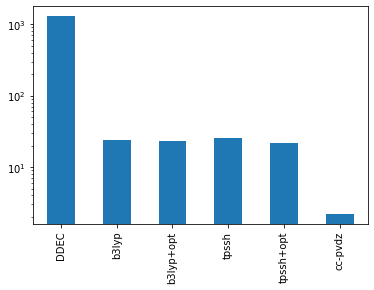

In [27]:
pd.Series({"DDEC":np.sum(error_ddec), "b3lyp":np.sqrt(np.sum(error_0)), "b3lyp+opt":np.sqrt(np.sum(error_1)), "tpssh":np.sqrt(np.sum(error_2)), "tpssh+opt":np.sqrt(np.sum(error_3)), "cc-pvdz":np.sqrt(np.sum(error_4))}).plot.bar(logy=True)

In [28]:
error_ddec = {"C":[], "H":[], "N":[], "O":[], "F":[], "S":[], "Cl":[], "Br":[], "I":[]}
error_0 = {"C":[], "H":[], "N":[], "O":[], "F":[], "S":[], "Cl":[], "Br":[], "I":[]}
error_1 = {"C":[], "H":[], "N":[], "O":[], "F":[], "S":[], "Cl":[], "Br":[], "I":[]}
error_2 = {"C":[], "H":[], "N":[], "O":[], "F":[], "S":[], "Cl":[], "Br":[], "I":[]}
error_3 = {"C":[], "H":[], "N":[], "O":[], "F":[], "S":[], "Cl":[], "Br":[], "I":[]}
error_4 = {"C":[], "H":[], "N":[], "O":[], "F":[], "S":[], "Cl":[], "Br":[], "I":[]}
exceptions = []
not_finished_counter = 0

for i in tqdm(range(1, 10000)):
    try:
        if len(glob(f"{data_folder}psi4_{i}_step*.csv")) == 6:
            cc_ref = pd.read_csv(f"{data_folder}psi4_{i}_step5.csv")
            for atom in mol_sup[i].GetAtoms():
                symbol = atom.GetSymbol()
                idx = atom.GetIdx()

                ddec_charge = float(atom.GetProp("molFileAlias"))
                error_ddec[symbol].append(np.abs(cc_ref["charge"][idx] - ddec_charge))

                step0 = pd.read_csv(f"{data_folder}psi4_{i}_step0.csv")
                error_0[symbol].append(np.abs(cc_ref["charge"][idx] - step0["charge"][idx]))

                step1 = pd.read_csv(f"{data_folder}psi4_{i}_step1.csv")
                error_1[symbol].append(np.abs(cc_ref["charge"][idx] - step1["charge"][idx]))

                step2 = pd.read_csv(f"{data_folder}psi4_{i}_step2.csv")
                error_2[symbol].append(np.abs(cc_ref["charge"][idx] - step2["charge"][idx]))

                step3 = pd.read_csv(f"{data_folder}psi4_{i}_step3.csv")
                error_3[symbol].append(np.abs(cc_ref["charge"][idx] - step3["charge"][idx]))

                step4 = pd.read_csv(f"{data_folder}psi4_{i}_step4.csv")
                error_4[symbol].append(np.abs(cc_ref["charge"][idx] - step4["charge"][idx]))          
        else:
            not_finished_counter += 1        
    except Exception as e:
        exceptions.append(e)

100%|██████████| 9999/9999 [09:03<00:00, 18.39it/s]


In [40]:
not_finished_counter

7341

In [42]:
len(exceptions)

0

In [29]:
for i in error_ddec:
    print(f"{i} - len: {len(error_ddec[i])}")


C - len: 32007
H - len: 32641
N - len: 6188
O - len: 5319
F - len: 1494
S - len: 1162
Cl - len: 723
Br - len: 694
I - len: 0


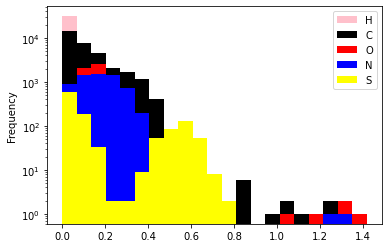

In [30]:
range_max = np.max([np.max(error_ddec[i]) for i in ["H", "C", "O", "N", "S"]])
ax = pd.DataFrame(error_ddec["H"]).plot.hist(bins=21, range=(0,range_max), color="pink", logy=True)
pd.DataFrame(error_ddec["C"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="black")
pd.DataFrame(error_ddec["O"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="red")
pd.DataFrame(error_ddec["N"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="blue")
pd.DataFrame(error_ddec["S"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="yellow")
ax.legend(["H", "C", "O", "N", "S"])

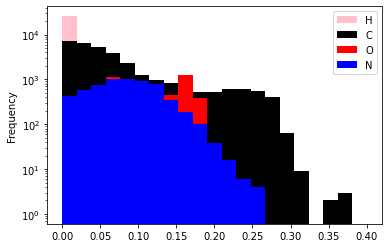

In [31]:
range_max = 0.4
data_set = error_0
ax = pd.DataFrame(data_set["H"]).plot.hist(bins=21, range=(0,range_max), color="pink", logy=True)
pd.DataFrame(data_set["C"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="black")
pd.DataFrame(data_set["O"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="red")
pd.DataFrame(data_set["N"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="blue")
ax.legend(["H", "C", "O", "N"])


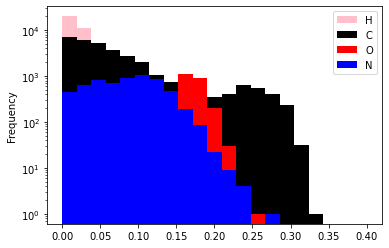

In [32]:
range_max = 0.4
data_set = error_1
ax = pd.DataFrame(data_set["H"]).plot.hist(bins=21, range=(0,range_max), color="pink", logy=True)
pd.DataFrame(data_set["C"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="black")
pd.DataFrame(data_set["O"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="red")
pd.DataFrame(data_set["N"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="blue")
ax.legend(["H", "C", "O", "N"])

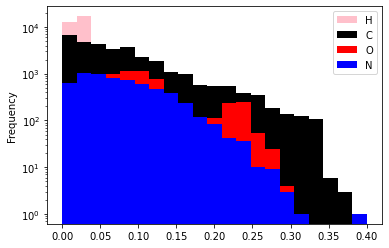

In [33]:
range_max = 0.4
data_set = error_2
ax = pd.DataFrame(data_set["H"]).plot.hist(bins=21, range=(0,range_max), color="pink", logy=True)
pd.DataFrame(data_set["C"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="black")
pd.DataFrame(data_set["O"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="red")
pd.DataFrame(data_set["N"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="blue")
ax.legend(["H", "C", "O", "N"])

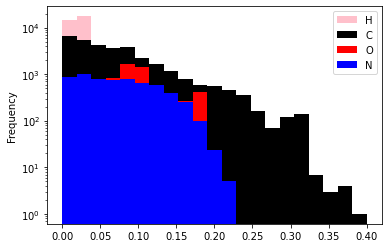

In [34]:
range_max = 0.4
data_set = error_3
ax = pd.DataFrame(data_set["H"]).plot.hist(bins=21, range=(0,range_max), color="pink", logy=True)
pd.DataFrame(data_set["C"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="black")
pd.DataFrame(data_set["O"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="red")
pd.DataFrame(data_set["N"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="blue")
ax.legend(["H", "C", "O", "N"])

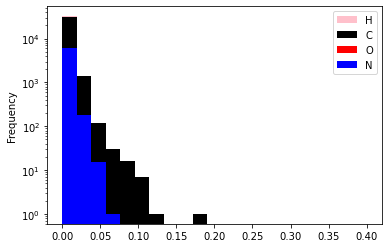

In [35]:
range_max = 0.4
data_set = error_4
ax = pd.DataFrame(data_set["H"]).plot.hist(bins=21, range=(0,range_max), color="pink", logy=True)
pd.DataFrame(data_set["C"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="black")
pd.DataFrame(data_set["O"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="red")
pd.DataFrame(data_set["N"]).plot.hist(bins=21, ax=ax, range=(0,range_max), color="blue")
ax.legend(["H", "C", "O", "N"])

In [36]:
error_ddec_rmse = {}
for i in error_ddec:
    error_ddec_rmse[i] = np.sqrt(np.mean(np.square(error_ddec[i])))

error_0_rmse = {}
for i in error_0:
    error_0_rmse[i] = np.sqrt(np.mean(np.square(error_0[i])))

error_1_rmse = {}
for i in error_1:
    error_1_rmse[i] = np.sqrt(np.mean(np.square(error_1[i])))

error_2_rmse = {}
for i in error_2:
    error_2_rmse[i] = np.sqrt(np.mean(np.square(error_2[i])))

error_3_rmse = {}
for i in error_3:
    error_3_rmse[i] = np.sqrt(np.mean(np.square(error_3[i])))

error_4_rmse = {}
for i in error_4:
    error_4_rmse[i] = np.sqrt(np.mean(np.square(error_4[i])))

/home/mlehner/.conda/envs/serenityff-charge-test/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mlehner/.conda/envs/serenityff-charge-test/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [37]:
df_rmse = pd.DataFrame([error_ddec_rmse, error_0_rmse, error_1_rmse, error_2_rmse, error_3_rmse, error_4_rmse], index=["ddec", "0", "1", "2", "3", "4"])

In [38]:
df_rmse_label = pd.DataFrame([error_ddec_rmse, error_0_rmse, error_1_rmse, error_2_rmse, error_3_rmse, error_4_rmse], index=["ddec", "MMFF+B3LYP", "B3LYP opt.", "TPSSH", "TPSSH opt.", "cc-pVTZ"])

<AxesSubplot:>

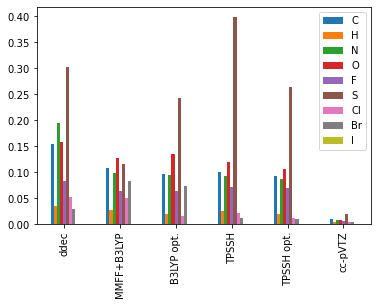

In [39]:
df_rmse_label.plot.bar()